In [1]:
import os
import sys
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Configuración de la ruta del sistema a la carpeta desde donde se importan las funciones

In [2]:
root_path = Path(os.getcwd()).resolve().parent
sys.path.append(str(root_path))

In [3]:
from scripts.auto_importer_laptops import CompleteDescribeTable

## Leer archivo ``parquet`` limpio después del primer análisis y crear la copia para trabajar con los datos

In [4]:
pd.set_option('display.max_columns', None) 

In [5]:
data = pd.read_parquet('../data/processed/train_limpio.parquet')

In [6]:
df = data.copy()

In [ ]:
df.head(5)

,Company,Product,TypeName,Inches,Resolution_X,Resolution_Y,Is_touch,Ram,CPU_Brand,CPU_Model,CPU_Freq,SSD,HDD,Hybrid,Flash_storage,GPU_Brand,GPU_Model,OpSys,Is_GPU_dedicated,Weight,Price_euros
laptop_ID,,,,,,,,,,,,,,,,,,,,,
599,Dell,Inspiron 3179,Convertible,11.6,1366,768,1,4,Intel,Core M 7Y30,1.0,128,0,0,0,Intel,HD Graphics 615,Windows,0,1.39,603.0
92,Asus,FX550IK-DM018T (FX-9830P/8GB/1TB/Radeon,Gaming,15.6,1920,1080,0,8,AMD,FX 9830P,3.0,0,1024,0,0,AMD,Radeon RX 560,Windows,1,2.45,699.0
744,HP,ZBook 15,Workstation,15.6,1920,1080,0,16,Intel,Core i7 7700HQ,2.8,256,0,0,0,Nvidia,Quadro M2200,Windows,1,2.60,2419.0
729,HP,Pavilion X360,Convertible,13.3,1366,768,1,8,Intel,Core i5 7200U,2.5,256,0,0,0,Intel,HD Graphics 620,Windows,0,1.58,836.6
957,Toshiba,Tecra A50-C-1ZV,Notebook,15.6,1366,768,0,8,Intel,Core i5 6200U,2.3,256,0,0,0,Intel,HD Graphics 520,Windows,0,2.20,1119.0


# Análisis exploratório de datos (EDA)

## Estadisticas descriptivas

Tabla resumen detallada

In [8]:
tabla_resumen = CompleteDescribeTable(df)
tabla_resumen.describe_complete()

In [9]:
df_resumen = tabla_resumen.get_describe_complete()

In [ ]:
df_resumen

,tipo de dato,tipo de variable,cardinalidad abs,cardinalidad %,distribucion,% missing,% Outliers,rango,moda,mediana,media,desv estandar,Q1,Q3,asimetria,curtosis,Valor estad.,Valor de P,prueba normalidad,tipo asimetria
variable,,,,,,,,,,,,,,,,,,,,
Company,object,categorica,19,2.083333,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
Product,object,categorica,484,53.070175,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
TypeName,object,categorica,6,0.657895,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
Inches,float64,numerica,18,1.973684,No Gaussiana,0.0,3.29,"(10.1, 18.4)",15.6,15.60,15.007785,1.454677,14.0000,15.60,-0.449882,-0.114037,0.880078,6.230082e-26,No normal,negativa
Resolution_X,int64,numerica,13,1.425439,No Gaussiana,0.0,7.02,"(1366, 3840)",1920.0,1920.00,1877.131579,470.439177,1600.0000,1920.00,2.214823,7.089993,0.642438,7.401426e-40,No normal,negativa
Resolution_Y,int64,numerica,10,1.096491,No Gaussiana,0.0,8.55,"(768, 2160)",1080.0,1080.00,1060.982456,271.138397,900.0000,1080.00,2.119331,6.263822,0.654359,2.231759e-39,No normal,negativa
Is_touch,int64,numerica,2,0.219298,No Gaussiana,0.0,15.24,"(0, 1)",0.0,0.00,0.152412,0.359617,0.0000,0.00,1.937347,1.757160,0.429734,9.187518e-47,No normal,negativa
Ram,int64,numerica,9,0.986842,No Gaussiana,0.0,16.67,"(2, 64)",8.0,8.00,8.377193,5.144482,4.0000,8.00,2.989951,19.009122,0.697995,1.684747e-37,No normal,negativa
CPU_Brand,object,categorica,3,0.328947,None,0.0,NaN,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


## Análisis univariado

In [11]:
categoric_cols = df.select_dtypes(include='object').columns

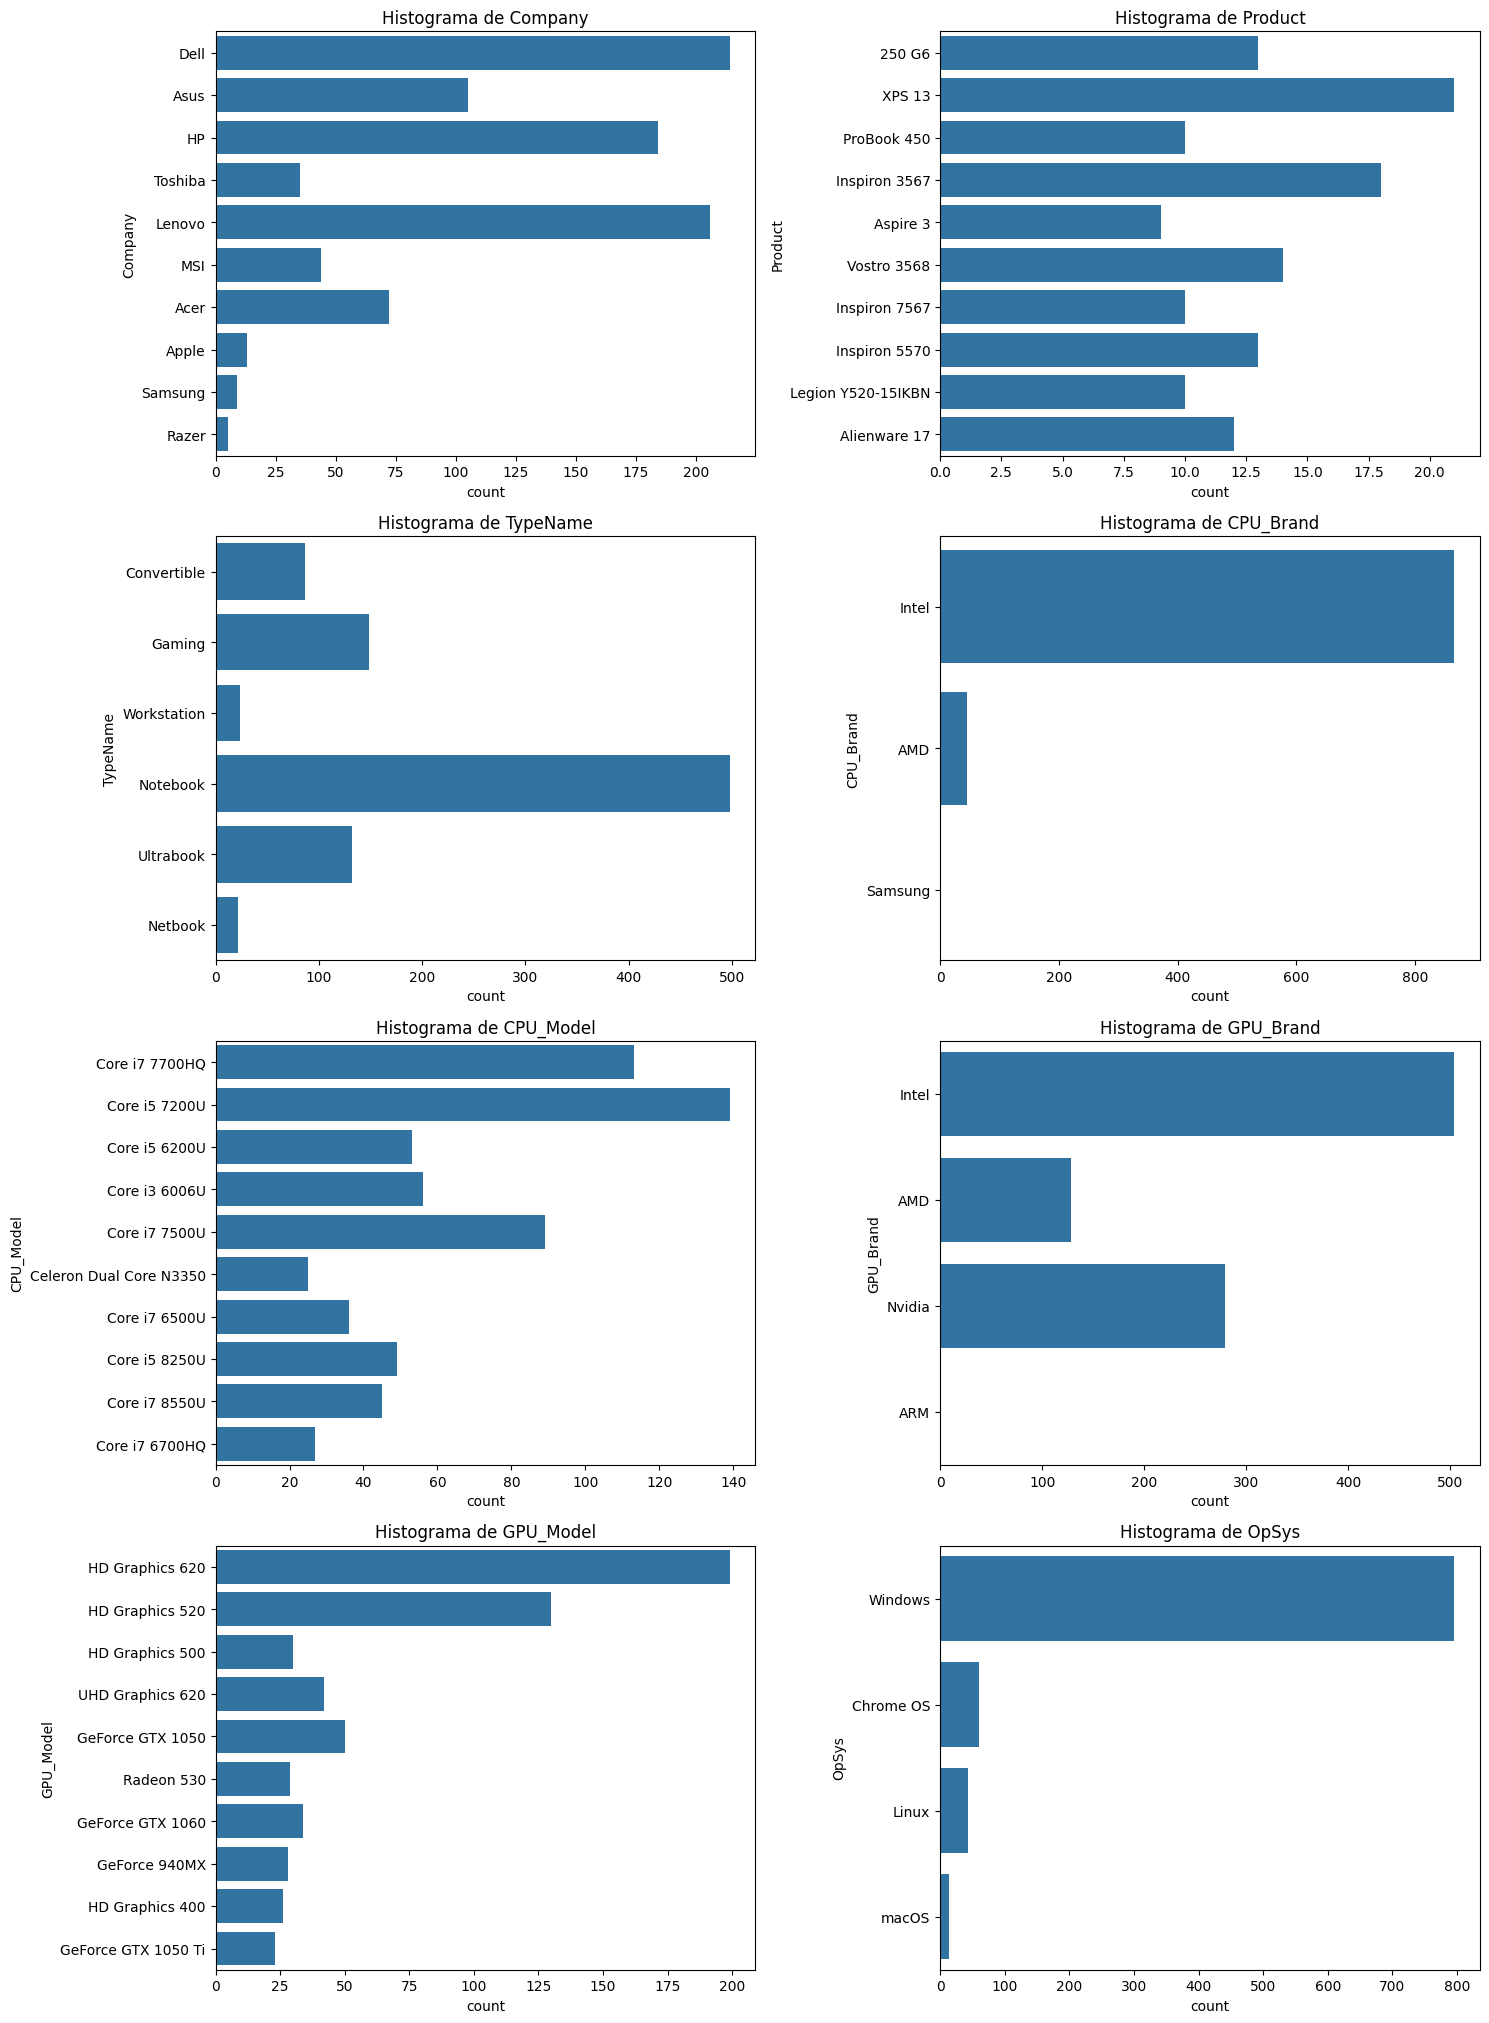

In [12]:
plt.figure(figsize=(15,30))
for i, col in enumerate(categoric_cols):
    top_10 = df[col].value_counts().head(10)
    df_filtrado_top_10 = df[df[col].isin(top_10.index)]
    plt.subplot(6,2, i+1)
    sns.countplot(data=df_filtrado_top_10[col])
    plt.title(f'Histograma de {col}')
    plt.tight_layout()

Número de ocurrencias de las variables categóricas que reflejan cuales son los dominantes en cada una de ellas.
* Columna Company  
    * La marca Dell domina el mercado, seguida de Lenovo, HP, Asus y Acer.
* Columna Product  
    * Los modelos XPS 13 de Dell son los más comunes: XPS 13 (Dell), Inspiron 3567 (Dell), Vostro 3568 (Dell), 250 G6 (HP) y Inspiron 5570 (Dell). En los top 5 sólo una vez entra otra marca, la HP, lo que puede confirmar los datos dichos arriba.
* Columna TypeName  
    * Los portátiles de uso general son los más comunes, seguidos por modelos gaming y ultrabook, que presentan una distribución similar.
* Columna CPU_Brand 
    * Intel domina el mercado de procesadores. AMD ocupa el segundo lugar, mientras que Samsung tiene una presencia marginal con sólo una aparición en el ranking.
* Columna CPU_Model  
    * El procesador Intel Core i5 7200U es el más utilizado, seguido de cerca por el Core i7 7700HQ y el Core i7 7500U.
* Columna GPU_Brand
    * Intel, Nvidia y AMD son las principales marcas de GPU, con Intel siendo la más dominante.
* Columna GPU_Model
    * La GPU Intel HD Graphics 620 es la más utilizada, seguida de la HD Graphics 520 y la GeForce GTX 1050.
* Columna OpSys
    * Windows es el sistema operativo más popular, seguido por Chrome OS, Linux y macOS.

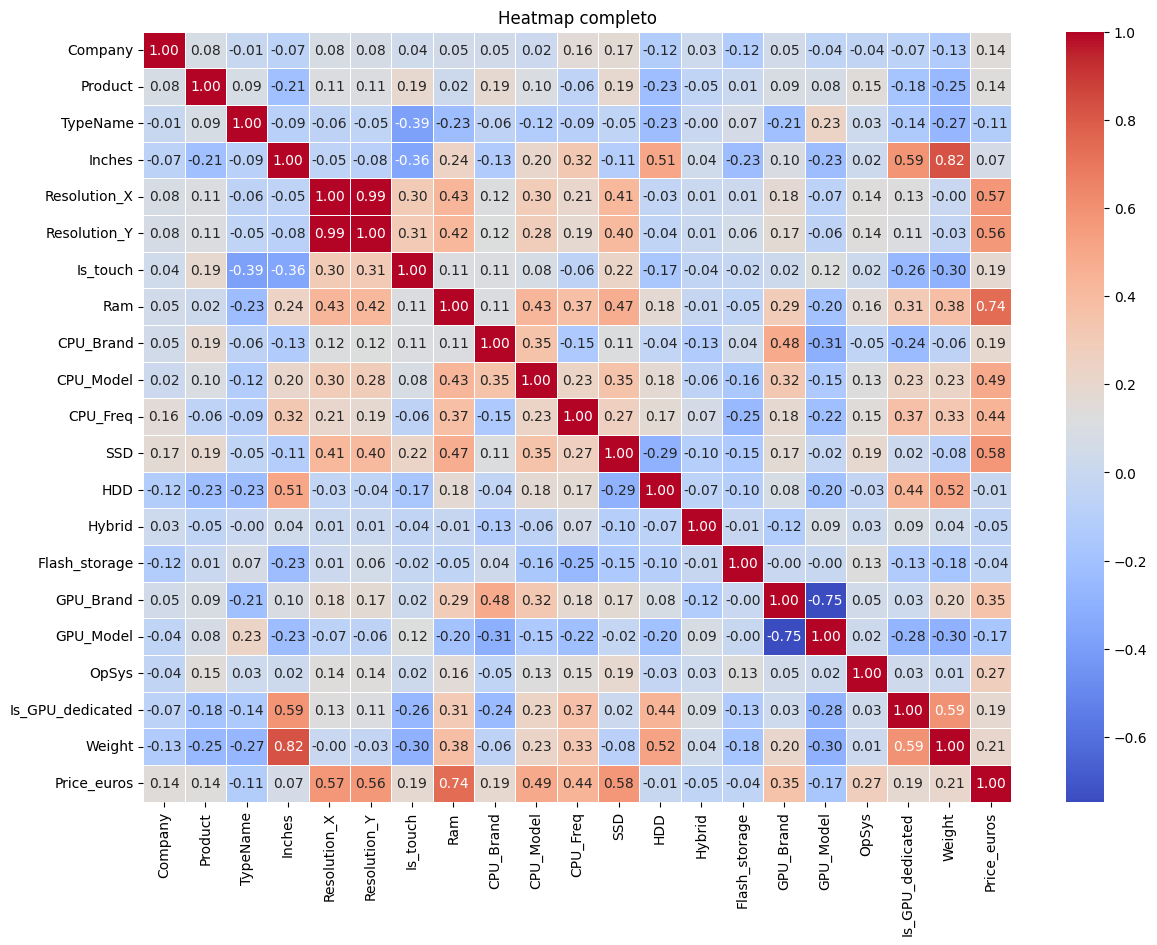

In [18]:
df_encoded = df.copy()
categorical_cols = df_encoded.select_dtypes(include=['object']).columns

for col in categorical_cols:
    df_encoded[col] = df_encoded[col].astype('category').cat.codes

correlation_matrix = df_encoded.corr()

filtered_correlatd_matrix = np.where((correlation_matrix >= .5) | (correlation_matrix <= -.5), correlation_matrix,0)

plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap completo")
plt.show()

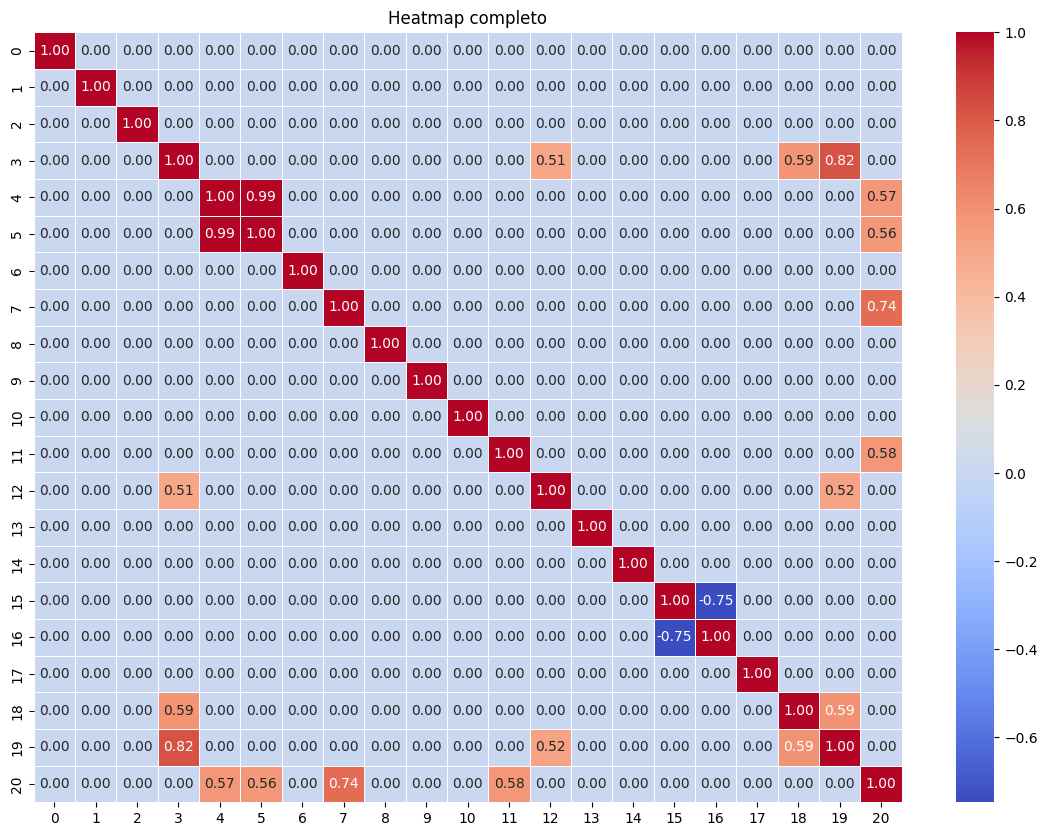

In [19]:
plt.figure(figsize=(14, 10))
sns.heatmap(filtered_correlatd_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Heatmap completo")
plt.show()

El gráfico de correlaciones revela una relación directa entre el precio de los equipos y ciertas especificaciones técnicas. Destaca una correlación positiva muy fuerte entre el precio y la memoria RAM, lo que indica que a medida que aumenta la cantidad de RAM, también lo hace el precio. Esta relación es lógica, ya que una mayor cantidad de RAM permite ejecutar más programas simultáneamente y realizar tareas más exigentes, lo cual es una característica muy valorada por los usuarios.

Además de la memoria RAM, el tamaño del disco duro SSD también muestra una fuerte correlación positiva con el precio, lo que sugiere que los equipos con mayor capacidad de almacenamiento suelen ser más costosos. Asimismo, se observa una relación positiva entre el precio y la resolución de pantalla, así como con la frecuencia del procesador. Esto se debe a que pantallas de mayor resolución y procesadores más rápidos ofrecen un mejor rendimiento y una experiencia de usuario más satisfactoria.

En resumen, las especificaciones que más influyen en el precio de un equipo son la memoria RAM, el tamaño del disco duro SSD, la resolución de pantalla y la frecuencia del procesador. Estas características son consideradas por los fabricantes como un valor agregado y, por lo tanto, se reflejan en un precio más elevado.